In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
import matplotlib.cm as cm
import os
import pandas as pd

In [2]:
from matplotlib.offsetbox import AnchoredText

def pval(m1, m2):
    return round(scipy.stats.ttest_ind(m1, m2)[1], 2)

def add_pvalues(ax, df, x_col, y_col, loc):
    # ax: to draw on
    # df: to pull data from
    # x_col: to be split into unique values
    # y_col: to perform stats on
    # loc: matplotlib style legend location string

    # Form text block
    text = 'P-values:'
    classes = df[x_col].unique()
    for i, a in enumerate(classes):
        temp_a = df[df[x_col] == a][y_col]  # Pull a values
        for b in classes[i + 1:]:
            temp_b = df[df[x_col] == b][y_col]  # Pull b values
            res = pval(temp_a, temp_b)  # Calculate P-value
            if res <= 0.001:
                res = '<0.001'

            # Add result to text
            text += '\n'
            text += '   {} vs. {}: {}'.format(a, b, res)

    # Add to plot
    anc = AnchoredText(text, loc=loc, frameon=False)
    ax.add_artist(anc)

def load_experiment_df(experiment, exudate):
    # output_path = f'output/FullFrame/Experiment {experiment}/'
    output_path = f'output/Experiment {experiment}/{exudate}/'
    df = pd.read_pickle(output_path + 'df.pkl')
    df['Experiment'] = experiment
    return df

# Adapted from https://github.com/mwaskom/seaborn/issues/2280
def control_legend(ax, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, title=title, **kws)

In [3]:
# Load in data for single experiment
exudate = 'Phosphatase'

conditions = {'plant only':[1, 2, 3, 4], 'chitin only': [5, 6, 7, 8],  'plant + chitin':[13, 14, 15, 16], 'plant + chitin + phosph': [21, 22, 23, 24]}
    
# conditionA = 'plant + chitin'
# conditionB = 'plant + chitin + phosph'
# hue = 'With Phosph'

# conditionA = 'plant only'
# conditionB = 'plant + chitin'
# hue = 'With Chitin'

# conditionA = 'chitin only'
# conditionB = 'plant + chitin'
# hue = 'With Plant'

conditionA = 'plant only'
conditionB = 'plant + chitin + phosph'
hue = 'With Phosph + Chitin'

experimentsA = conditions[conditionA]
experimentsB = conditions[conditionB]

experiments = experimentsA + experimentsB

df = load_experiment_df(experiments[0], exudate)
for experiment in experiments[1:]:
    temp = load_experiment_df(experiment, exudate)
    df = pd.concat([df, temp])
df.head()

output_path = f'/Users/nune558/OneDrive - PNNL/Projects/chitinase/repo/output/Across Experiments/{exudate}/{hue}/'

# Create output path if needed
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [4]:
df['Experiment'].value_counts()

1     241800
4     233100
2     220825
3     216000
22    212093
21    210616
24    210450
23    209370
Name: Experiment, dtype: int64

In [5]:
g = df.groupby(['Experiment', 'Level', 'Root']).agg({'Stain': ['mean', 'std']})
g = g['Stain'].reset_index()
g['With Plant'] = (g['Experiment'] < 5) | (g['Experiment'] > 8)
g['With Chitin'] = g['Experiment'] > 4
g['With Phosph'] = g['Experiment'] > 20
g['With Phosph + Chitin'] = g['Experiment'] > 20

if hue == 'With Plant':
    legend_title = 'Experiment w/\nSwitchgrass'

if hue == 'With Chitin':
    legend_title = 'Experiment w/\nChitin'

if hue == 'With Phosph':
    legend_title = 'Experiment w/\nPhosphorous'

if hue == 'With Phosph + Chitin':
    legend_title = 'Experiment w/\nPhosph & Chitin'
g

,Experiment,Level,Root,mean,std,With Plant,With Chitin,With Phosph,With Phosph + Chitin
0,1,A,False,0.226682,1.465810,True,False,False,False
1,1,A,True,0.367085,1.753670,True,False,False,False
2,2,A,False,0.064472,1.020288,True,False,False,False
3,2,A,True,0.303289,1.249363,True,False,False,False
4,3,A,False,0.092013,1.225541,True,False,False,False
5,3,A,True,0.199445,1.324809,True,False,False,False
6,4,A,False,0.206850,1.160748,True,False,False,False
7,4,A,True,0.267425,1.209494,True,False,False,False
8,21,A,False,0.013115,0.869019,True,True,True,True
9,21,A,True,0.328519,1.175110,True,True,True,True


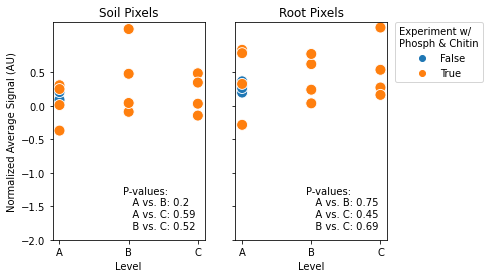

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(6, 4), sharey=True, sharex=True)
for root, ax in zip([False, True], axes):
    temp = g[g['Root'] == root]
    sns.scatterplot(data=temp, x='Level', y='mean', hue=hue, hue_order=[False, True], s=120, ax=ax)
    ax.set_ylabel(None)
    ax.set_yticks([])
    add_pvalues(ax, temp, 'Level', 'mean', 'lower right')

    if root:
        ax.set_title('Root Pixels')
        ax.legend(title=legend_title)
        control_legend(ax, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    else:
        ax.set_title('Soil Pixels')
        ax.legend().remove()

axes[0].set_yticks([-2, -1.5, -1, -0.5, 0, 0.5])
axes[0].set_ylabel('Normalized Average Signal (AU)')
plt.savefig(output_path + f'/Scatter_AcrossExperiments_Levels', dpi=400, bbox_inches='tight')
plt.show()

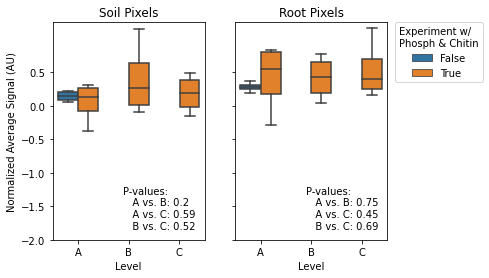

A nan
B nan
C nan


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(6, 4), sharey=True, sharex=True)
for root, ax in zip([False, True], axes):
    temp = g[g['Root'] == root]
    sns.boxplot(data=temp, x='Level', y='mean', hue=hue, hue_order=[False, True], ax=ax)
    ax.set_ylabel(None)
    ax.set_yticks([])
    add_pvalues(ax, temp, 'Level', 'mean', 'lower right')

    if root:
        ax.set_title('Root Pixels')
        ax.legend(title=legend_title)
        control_legend(ax, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    else:
        ax.set_title('Soil Pixels')
        ax.legend().remove()

axes[0].set_yticks([-2, -1.5, -1, -0.5, 0, 0.5])
axes[0].set_ylabel('Normalized Average Signal (AU)')
plt.savefig(output_path + f'/Boxplot_Levels', dpi=400, bbox_inches='tight')
plt.show()

for level in g['Level'].unique():
    temp = g[g['Level'] == level]
    temp = temp[~temp['Root']]

    a = temp[temp['With Plant']]['mean']
    b = temp[~temp['With Plant']]['mean']

    print(level, pval(a, b))

In [61]:
# Plot single overview figure for paper
output_path = f'output/Across Experiments/{exudate}/'
# Outliers removed based on visual inspection

if exudate == 'Chitinase':
    xticklabels = ['Plant', 'Chitin', 'Plant + Chitin', 'Plant + Chitin + Phosph']
    sets = {'Plant': [1, 2, 3, 4], 'Chitin': [5, 6, 7, 8],
            'Plant + Chitin': [13, 14, 15, 16],
            'Plant + Chitin + Phosph': [21, 22, 23, 24]
            }
elif exudate == 'Phosphatase':
    xticklabels = ['Plant', 'Plant + Chitin + Phosph']
    sets = {'Plant': [1, 2, 3, 4],
            'Plant + Chitin + Phosph': [21, 22, 23, 24]
            }

# Hacky way of initializing a dataframe and ensuring all columns are there
df = load_experiment_df(1, exudate)
df['Name'] = 'NaN'
df.drop(df.index, inplace=True)

# Add all experimental data to the dataframe
for name, experiments in sets.items():
    for experiment in experiments:
        temp = load_experiment_df(experiment, exudate)

        # TEMP: use middle of 1-4 as dummy chitin band
        if experiment in [1, 2, 3, 4]:
            w = temp['i'].max() / 5
            temp = temp[(temp['i'] > w * 2) & (temp['i'] < w * 3)]

        temp['Name'] = name
        df = pd.concat([df, temp])

# Keep only Level B
df = df[(df['Level'] == 'B') | (df['Name'] == 'Plant')]

# Group experiment data
g = df.groupby(['Name', 'Experiment', 'Root']).agg({'Stain': ['mean', 'std']})
g = g['Stain'].reset_index()

# Sort
g = g.sort_values('Experiment')

g

,Name,Experiment,Root,mean,std
0,Plant,1,False,0.131086,1.581716
1,Plant,1,True,0.324138,1.875494
2,Plant,2,False,-0.164129,0.739262
3,Plant,2,True,0.024629,1.006342
4,Plant,3,False,-0.218264,1.170380
5,Plant,3,True,-0.056717,1.395565
6,Plant,4,False,0.061827,0.991528
7,Plant,4,True,0.030398,0.935612
8,Plant + Chitin + Phosph,21,False,-0.088154,0.694827
9,Plant + Chitin + Phosph,21,True,0.038243,0.801864


In [62]:
# Get averages across each experiment
y = g.groupby(['Name', 'Root']).mean()
y = y.unstack(1)['mean']
y = y.loc[xticklabels]
y

Root,False,True
Name,,
Plant,-0.047370,0.080612
Plant + Chitin + Phosph,0.395894,0.420197


In [63]:
# Calculate standard deviation of the means
yerr = g.groupby(['Name', 'Root']).std()
yerr = yerr.unstack(1)['mean']
yerr = yerr.loc[xticklabels]
yerr

Root,False,True
Name,,
Plant,0.169910,0.167153
Plant + Chitin + Phosph,0.557163,0.339552


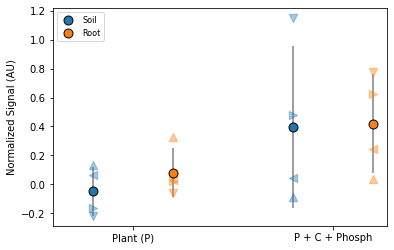

Root =  False
Plant vs. Plant + Chitin + Phosph: 0.18
Root =  True
Plant vs. Plant + Chitin + Phosph: 0.12


In [73]:
def grab_nth_value(g, n, force_index=None):
    temp = g.sort_values('Experiment').groupby(['Name'])
    temp = temp.tail(len(temp) - (n - 1)).groupby(['Name']).head(1)
    if force_index is not None:
        temp.index = temp['Name']
        return temp.reindex(force_index)
    return temp

markers = ['^', '>', 'v', '<']
colors = sns.color_palette()[:2]
dodge = 0.2

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Scatter points for individual eperiment averages
for i in range(len(g['Name'].unique())):
    y_temp = g[(~g['Root']) & (g['Name'] == xticklabels[i])].sort_values('Experiment')['mean'].to_list()
    for j in range(len(y_temp)):
        plt.scatter(x=i - dodge, y=y_temp[j], marker=markers[j],
                    color=colors[0], alpha=0.4, s=70)
    
    y_temp = g[g['Root'] & (g['Name'] == xticklabels[i])].sort_values('Experiment')['mean'].to_list()
    for j in range(len(y_temp)):
        plt.scatter(x=i + dodge, y=y_temp[j], marker=markers[j],
                    color=colors[1], alpha=0.4, s=70)

# Soil overall averages
if exudate == 'Chitinase':
    x = [-dodge, 1 - dodge, 2 - dodge, 3 - dodge]
elif exudate == 'Phosphatase':
    x = [-dodge, 1 - dodge]
plt.errorbar(x, y[False], yerr=yerr[False], fmt='none', color='gray', zorder=-10, label='_nolegend_')
plt.scatter(x, y[False], s=80, color=colors[0], label='Soil', edgecolor='k')

# Root overall averages
if exudate == 'Chitinase':
    x = [dodge, 1 + dodge, 2 + dodge, 3 + dodge]
elif exudate == 'Phosphatase':
    x = [dodge, 1 + dodge]
plt.errorbar(x, y[True], yerr=yerr[True], fmt='none', color='gray', zorder=-10, label='_nolegend_')
plt.scatter(x, y[True], s=80, color=colors[1], label='Root', edgecolor='k')

plt.xlim(left=-0.4)

plt.xlabel(None)
plt.ylabel('Normalized Signal (AU)')
if exudate == 'Chitinase':
    plt.xticks([0, 1, 2, 3], ['Plant (P)', 'Chitin (C)', 'P + C', 'P + C + Phosph'])
elif exudate == 'Phosphatase':
    plt.xticks([0, 1], ['Plant (P)', 'P + C + Phosph'])

h, l = ax.get_legend_handles_labels()
plt.legend(handles=h[-2:], labels=l[-2:], loc='upper left', fontsize=8)
plt.savefig(output_path + 'Scatter_4', dpi=400, bbox_inches='tight')
plt.show()

# Form text block
for root in [False, True]:
    print('Root = ', root)
    df = g[g['Root'] == root]
    x_col = 'Name'
    y_col = 'mean'
    classes = df[x_col].unique()
    for i, a in enumerate(classes):
        temp_a = df[df[x_col] == a][y_col]  # Pull a values
        for b in classes[i + 1:]:
            temp_b = df[df[x_col] == b][y_col]  # Pull b values
            res = pval(temp_a, temp_b)  # Calculate P-value
            if res <= 0.001:
                res = '<0.001'
            print('{} vs. {}: {}'.format(a, b, res))

In [15]:
if exudate == 'Chitinase':
    plt.figure(figsize=(6, 4))

    cmap = cm.get_cmap('tab10')

    markers = ['^', '>', 'v', '<']
    for i in range(len(g['Name'].unique())):
        temp1 = grab_nth_value(g[g['Root']], i, force_index=xticklabels)
        temp2 = grab_nth_value(g[~g['Root']], i + 1, force_index=xticklabels)
        temp = pd.concat([temp1, temp2])
        ax = sns.stripplot(data=temp, x=temp.index, y='mean', hue='Root', marker=markers[i],
                        hue_order=[False, True], s=10, dodge=True, jitter=False, alpha=0.4)

    dodge = 0.2

    color = cmap(0)
    x = [-dodge, 1 - dodge, 2 - dodge, 3 - dodge]
    plt.errorbar(x, y[False], yerr=yerr[False], fmt='none', color='gray', zorder=-1, label='_nolegend_')
    plt.scatter(x, y[False], s=80, color=color, label='Soil', edgecolor='k')

    color = cmap(1)
    x = [dodge, 1 + dodge, 2 + dodge, 3 + dodge]
    plt.errorbar(x, y[True], yerr=yerr[True], fmt='none', color='gray', zorder=-10, label='_nolegend_')
    plt.scatter(x, y[True], s=80, color=color, label='Root', edgecolor='k')

    plt.xlim(left=-0.4, right=2.5)

    plt.xlabel(None)
    plt.ylabel('Normalized Signal (AU)')
    plt.xticks([0, 1, 2], ['Plant (P)', 'Chitin (C)', 'Plant + Chitin'])

    h, l = ax.get_legend_handles_labels()
    plt.legend(handles=h[-2:], labels=l[-2:], loc='upper left', fontsize=8)
    plt.savefig(output_path + '/Scatter_3', dpi=400, bbox_inches='tight')
    plt.show()

    # Form text block
    for root in [False, True]:
        print('Root = ', root)
        df = g[g['Root'] == root]
        x_col = 'Name'
        y_col = 'mean'
        classes = df[x_col].unique()
        for i, a in enumerate(classes):
            temp_a = df[df[x_col] == a][y_col]  # Pull a values
            for b in classes[i + 1:]:
                temp_b = df[df[x_col] == b][y_col]  # Pull b values
                res = pval(temp_a, temp_b)  # Calculate P-value
                if res <= 0.001:
                    res = '<0.001'
                print('{} vs. {}: {}'.format(a, b, res))

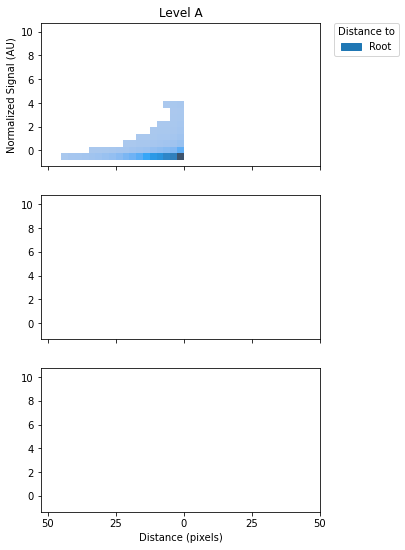

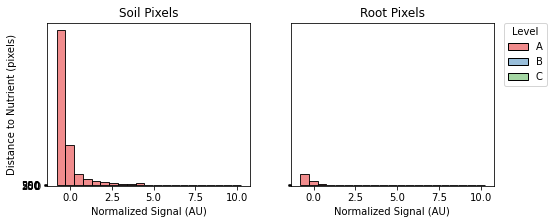

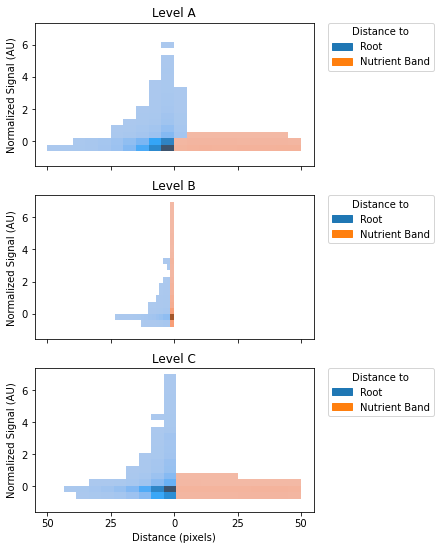

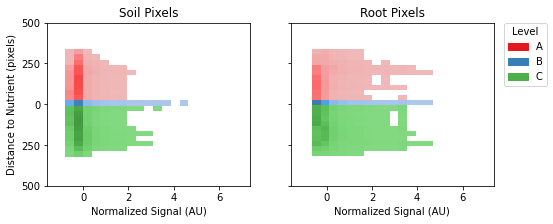

In [17]:
# Combine 3 experiments for the 2d hists (13, 14, 16)

## Load in experiments of interest ##
if exudate == 'Chitinase':
    xticklabels = ['Plant', 'Nutrient', 'Plant + Nutrient']
    sets = {'Plant': [1, 2, 3, 4], 'Nutrient': [5, 6, 7, 8],
            'Plant + Nutrient': [13, 14, 15, 16],
            }
elif exudate == 'Phosphatase':
    xticklabels = ['Plant', 'Plant + Nutrient']
    sets = {'Plant': [1, 2, 3, 4],
            'Plant + Nutrient': [21, 22, 23, 24],
            }

# Add all experimental data to the dataframe
for name, experiments in sets.items():

    # Hacky way of initializing a dataframe and ensuring all columns are there
    df = load_experiment_df(1, exudate)
    df['Name'] = 'NaN'
    df.drop(df.index, inplace=True)

    for experiment in experiments:
        temp = load_experiment_df(experiment, exudate)

        # TEMP: use middle of 1-4 as dummy chitin band
        if experiment in [1, 2, 3, 4]:
            w = temp['i'].max() / 5
            temp = temp[(temp['i'] > w * 2) & (temp['i'] < w * 3)]

        temp['Name'] = name
        df = pd.concat([df, temp])
    df = df.reset_index()

    ## Dist2Root vs. Dist2Chitin ##
    # Create dataframe for 2D hist plot
    temp = df.copy()
    temp = temp[['(i, j)', 'Stain', 'Dist2Root', 'Dist2Nutrient', 'Level']]
    temp['Dist2Root'] *= -1
    temp = temp.rename(columns={'Dist2Root': 'Root', 'Dist2Nutrient': 'Nutrient Band'})
    temp = temp.melt(id_vars=('(i, j)', 'Level', 'Stain'), value_vars=('Root', 'Nutrient Band'), var_name='Distance to')
    temp = temp[abs(temp['value']) < 50]

    ## Create plot with the joint experiment data ##
    fig, axes = plt.subplots(3, 1, figsize=(5, 9), sharey=True, sharex=True)
    plt.subplots_adjust(hspace=0.2)
    for level, ax in zip(df['Level'].unique(), axes.flatten()):
        temp_level = temp[temp['Level'] == level]

        ax = sns.histplot(data=temp_level, x='value', y='Stain', hue='Distance to', bins=20, ax=ax, pthresh=0.05)
        ax.set_title(f'Level {level}')
        ax.set_ylabel('Normalized Signal (AU)')
        control_legend(ax, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks([-50, -25, 0, 25, 50], [50, 25, 0, 25, 50])
    plt.xlabel('Distance (pixels)')

    plt.savefig(output_path + f'Hist2D_Dist2Both_CombinedExperiments_{name}', dpi=400, bbox_inches='tight')
    plt.show()

    ## Root vs soil signal ##

    palette = ['#e41a1c', '#377eb8', '#4daf4a']
    temp_palette = [palette[0], palette[2], palette[1]]

    fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True, sharex=True)
    for ax, root in zip(axes.flatten(), [False, True]):
        
        temp = df.copy()
        temp.loc[temp['Level'] == 'C', 'Dist2Nutrient'] *= -1
        temp = temp[temp['Root'] == root]

        if len(temp) > 0:
            sns.histplot(data=temp, y='Dist2Nutrient', x='Stain', hue='Level',
                        hue_order=('A', 'C', 'B'), bins=21, palette=temp_palette, ax=ax,
                        legend=~root, pthresh=0.05)
        ax.set_ylabel('Distance to Nutrient (pixels)')
        
        ax.set_yticks([-500, -250, 0, 250, 500])
        ax.set_yticklabels([500, 250, 0, 250, 500])

        legend = ax.get_legend()
        if root:
            ax.set_title('Root Pixels')
            ax.set_xlabel('Normalized Signal (AU)')

            if len(temp) > 0:  # Avoid errors
                handles = legend.legendHandles
                handles = [handles[0], handles[2], handles[1]]
                legend.remove()
                ax.legend(handles=handles, labels=['A', 'B', 'C'], title='Level', loc='upper right')
                control_legend(ax, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        else:
            ax.set_title('Soil Pixels')
            ax.set_xlabel('Normalized Signal (AU)')
            legend.remove()

    plt.savefig(output_path + f'Hist2D_Dist2Nutrient_CombinedExperiments_{name}', dpi=400, bbox_inches='tight')
    plt.show()